#LOAD DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/buktiUji_Skripsi/Dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#IMPORT LIBRARY

In [ ]:
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold, StratifiedKFold
import pandas as pd
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import Input
from tensorflow.keras.layers import  MaxPooling2D, Dense, Dropout, Conv2D, MaxPool2D, Flatten, Reshape, BatchNormalization, Add, GlobalAveragePooling2D, ZeroPadding2D, AveragePooling2D, Activation
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision,SensitivityAtSpecificity, SpecificityAtSensitivity, Metric, TruePositives,FalseNegatives, Recall
from tensorflow.keras.models import load_model
from keras.models import load_model
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from tensorflow.python.keras.utils import metrics_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files
from keras.applications.vgg19 import preprocess_input
from sklearn.utils import shuffle, resample
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping, ModelCheckpoint,CSVLogger, ReduceLROnPlateau, LearningRateScheduler
import datetime
from sklearn.metrics import accuracy_score, classification_report
from keras import backend as K
import random
from sklearn.model_selection import train_test_split,  StratifiedShuffleSplit
!pip install pycm==3.1
%load_ext tensorboard
from pycm import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#LABELLING DATA

In [ ]:
df = None
for label in os.listdir(data_dir):
  data = []
  for img_filename in os.listdir(data_dir + '/' + label):
    filename, ext = os.path.splitext(img_filename)
    label_folder = os.path.join(data_dir, label)
    src_img_filepath = os.path.join(label_folder, img_filename)
    data.append(src_img_filepath)
  new_df = pd.DataFrame(data, columns=['path',])
  new_df['label'] = label
  df = pd.concat([df, new_df])
df

,path,label
0,/content/drive/MyDrive/buktiUji_Skripsi/Datase...,normal
1,/content/drive/MyDrive/buktiUji_Skripsi/Datase...,normal
2,/content/drive/MyDrive/buktiUji_Skripsi/Datase...,normal
3,/content/drive/MyDrive/buktiUji_Skripsi/Datase...,normal
4,/content/drive/MyDrive/buktiUji_Skripsi/Datase...,normal
...,...,...
15,/content/drive/MyDrive/buktiUji_Skripsi/Datase...,monkeypox
16,/content/drive/MyDrive/buktiUji_Skripsi/Datase...,monkeypox
17,/content/drive/MyDrive/buktiUji_Skripsi/Datase...,monkeypox
18,/content/drive/MyDrive/buktiUji_Skripsi/Datase...,monkeypox


#SPLIT DATASET FOR CV

In [ ]:
df_train_val, df_test = train_test_split(df, random_state=42, test_size=0.1 )
df_train_val.to_csv('/content/drive/MyDrive/buktiUji_Skripsi/train_label.csv', index=False)
df_test.to_csv('/content/drive/MyDrive/buktiUji_Skripsi/test_label.csv', index=False)
image_size=(224, 224)

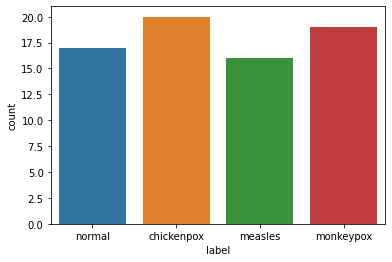

In [ ]:
ax = sns.countplot(x="label", data=df_train_val,)
plt.show()

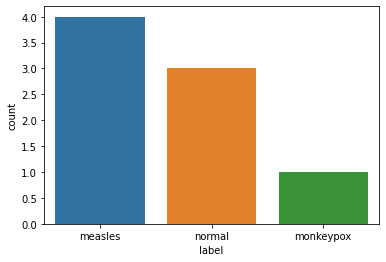

In [ ]:
ax = sns.countplot(x="label", data=df_test,)
plt.show()

#IMPORT MODEL

In [ ]:
model = keras.Sequential()

# Creating first block- (2 Convolution + 1 Max pool)
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', input_shape= (224, 224, 3), activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating second block- (2 Convolution + 1 Max pool)
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating third block- (4 Convolution + 1 Max pool)
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating fourth block- (4 Convolution + 1 Max pool)
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating fifth block- (4 Convolution + 1 Max pool)
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Flattening the pooled image pixels
model.add(Flatten())

# Creating 2 Dense Layers
model.add(Dense(units= 4096, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units= 4096, activation='relu'))
model.add(Dropout(rate=0.5))

# Creating an output layer
model.add(Dense(units= 4, activation='softmax'))

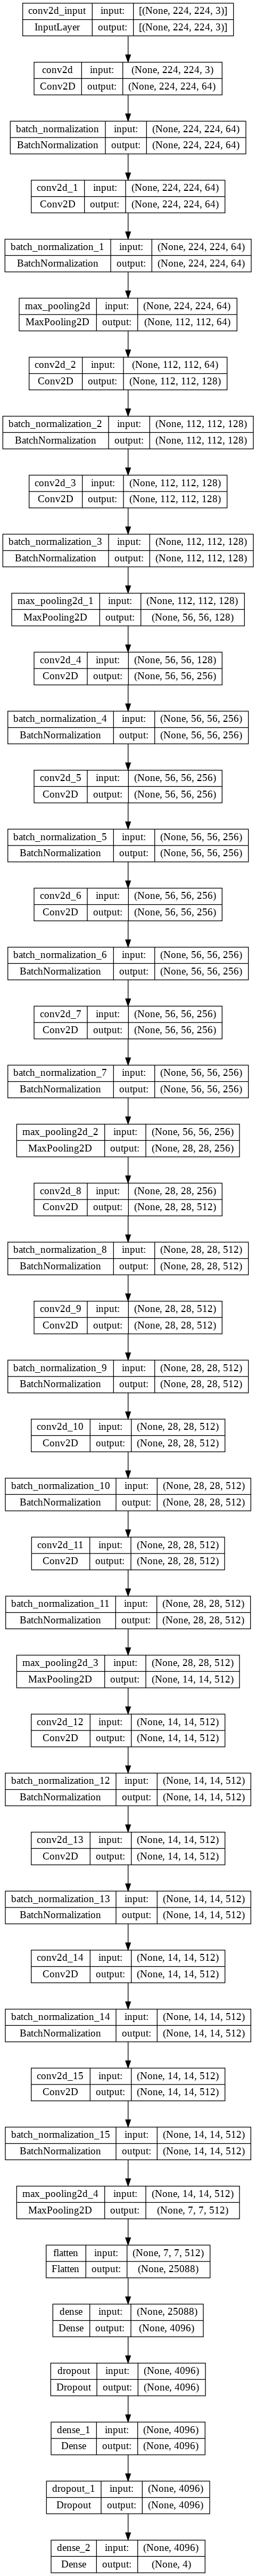

In [ ]:
plot_model(model = model, show_shapes = True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                        

#PROSES AUGMENTASI DATA

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,)
train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val, 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 

class_names = train_generator.class_indices
print(class_names)
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  # print(image_batch[0].shape)
  # zz.fit(image_batch)
  break

Found 72 validated image filenames belonging to 4 classes.
{'chickenpox': 0, 'measles': 1, 'monkeypox': 2, 'normal': 3}
(32, 224, 224, 3)
(32, 4)


#PELATIHAN MODEL

In [ ]:
def cross_validation_model_evaluate(model,  valData, i):
  val_datagen = ImageDataGenerator(rescale=1./255,)
  valData = df_train_val.iloc[val_index]
  val_generator = val_datagen.flow_from_dataframe(
        dataframe=valData,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )

  Y_pred = model.predict(val_generator,)
  y_pred = np.argmax(Y_pred, axis=1)
  y_test = val_generator.classes
  cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
  print(cm)
  eval_csv = '/content/drive/MyDrive/buktiUji_Skripsi/' +"Model_1/" + '_fold_' + str(i) + '_model.log'
  eval_csv = pd.read_csv(eval_csv, )
  plt.plot(eval_csv['accuracy'])
  plt.plot(eval_csv['loss'])
  plt.plot(eval_csv['val_accuracy'])
  plt.plot(eval_csv['val_loss'])
  plt.title('model performance')
  plt.ylabel('accuracy / loss')
  plt.xlabel('epoch')
  plt.legend(['train_accuracy', 'train_loss', 'val_accuracy', 'val_loss'], loc='upper left')
  plt.show()
  eval_csv = eval_csv[(eval_csv.val_accuracy == eval_csv.val_accuracy.max())]
  eval_csv = eval_csv[(eval_csv.val_loss== eval_csv.val_loss.min())]
  print(eval_csv)

#PENGUJIAN MODEL K-CV

##SKEN 1

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 1:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (64, 2)
val shape: (8, 2)
Found 64 validated image filenames belonging to 4 classes.
Found 8 validated image filenames belonging to 4 classes.
Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 128.1848 - accuracy: 0.2188
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to /content/drive/MyDrive/buktiUji_Skripsi/Model_1/_fold_1_model.h5
2/2 [==============================] - 37s 11s/step - loss: 128.1848 - accuracy: 0.2188 - val_loss: 1.7858 - val_accuracy: 0.2500
Epoch 2/100
2/2 [==============================] - ETA: 0s - loss: 106.7868 - accuracy: 0.2969
Epoch 2: val_accuracy did not improve from 0.25000
2/2 [==============================] - 2s 848ms/step - loss: 106.7868 - accuracy: 0.2969 - val_loss: 37.9803 - val_accuracy: 0.2500
Epoch 3/100
2/2 [==============================] - ETA: 0s - loss: 32.4587 - accuracy: 0.2656
Epoch 3: val_accuracy did not improve from 0.25000
2/2 [==============================] - 2s 787ms/step - loss: 3

###EVAL

Found 8 validated image filenames belonging to 4 classes.
1/1 [==============================] - 1s 530ms/step
Predict 0       1       2       3       
Actual
0       0       2       0       0       

1       0       2       0       0       

2       0       1       1       0       

3       0       0       0       2       





Overall Statistics : 

95% CI                                                            (0.28952,0.96048)
ACC Macro                                                         0.8125
ARI                                                               0.24096
AUNP                                                              0.75
AUNU                                                              0.75
Bangdiwala B                                                      0.5625
Bennett S                                                         0.5
CBA                                                               0.475
CSI                                                       

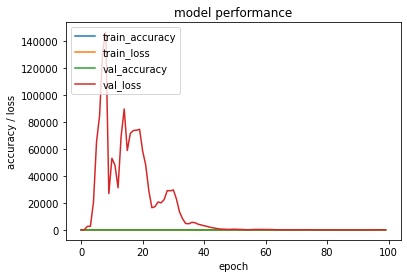

    epoch  accuracy      loss  val_accuracy   val_loss
84     84   0.65625  1.760844           0.5  23.806995


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 42)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 1:
    model_filepath = '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 2

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 2:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (64, 2)
val shape: (8, 2)
Found 64 validated image filenames belonging to 4 classes.
Found 8 validated image filenames belonging to 4 classes.
Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 10.9177 - accuracy: 0.4688
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to /content/drive/MyDrive/buktiUji_Skripsi/Model_1/_fold_2_model.h5
2/2 [==============================] - 11s 8s/step - loss: 10.9177 - accuracy: 0.4688 - val_loss: 1483.8738 - val_accuracy: 0.2500
Epoch 2/100
2/2 [==============================] - ETA: 0s - loss: 9.2329 - accuracy: 0.2969 
Epoch 2: val_accuracy did not improve from 0.25000
2/2 [==============================] - 2s 823ms/step - loss: 9.2329 - accuracy: 0.2969 - val_loss: 3714.5068 - val_accuracy: 0.2500
Epoch 3/100
2/2 [==============================] - ETA: 0s - loss: 13.8338 - accuracy: 0.3281
Epoch 3: val_accuracy did not improve from 0.25000
2/2 [==============================] - 2s 908ms/step - loss: 13

###EVAL

Found 8 validated image filenames belonging to 4 classes.
1/1 [==============================] - 0s 333ms/step
Predict 0       1       2       3       
Actual
0       0       0       2       0       

1       1       0       1       0       

2       0       0       2       0       

3       0       0       0       2       





Overall Statistics : 

95% CI                                                            (0.15352,0.84648)
ACC Macro                                                         0.75
ARI                                                               0.24096
AUNP                                                              0.66667
AUNU                                                              0.66667
Bangdiwala B                                                      0.5
Bennett S                                                         0.33333
CBA                                                               0.35
CSI                                                   

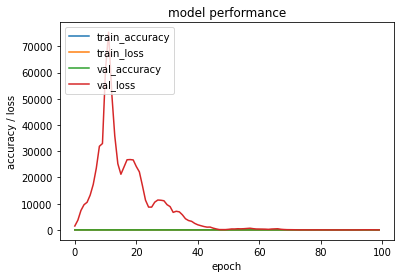

    epoch  accuracy     loss  val_accuracy  val_loss
84     84       0.5  3.96246         0.625  2.959254


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 42)
i = 2
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 2:
    model_filepath = '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 3

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 3:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (65, 2)
val shape: (7, 2)
Found 65 validated image filenames belonging to 4 classes.
Found 7 validated image filenames belonging to 4 classes.
Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 1.5645 - accuracy: 0.4923
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to /content/drive/MyDrive/buktiUji_Skripsi/Model_1/_fold_3_model.h5
3/3 [==============================] - 15s 6s/step - loss: 1.5645 - accuracy: 0.4923 - val_loss: 13.1540 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 2.6968 - accuracy: 0.4154
Epoch 2: val_accuracy improved from 0.00000 to 0.14286, saving model to /content/drive/MyDrive/buktiUji_Skripsi/Model_1/_fold_3_model.h5
3/3 [==============================] - 10s 5s/step - loss: 2.6968 - accuracy: 0.4154 - val_loss: 16.3112 - val_accuracy: 0.1429
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 3.7860 - accuracy: 0.3385
Epoch 3: val_accuracy did not impr

###EVAL

Found 8 validated image filenames belonging to 4 classes.
1/1 [==============================] - 0s 400ms/step
Predict 0       1       2       3       
Actual
0       2       0       0       0       

1       2       0       0       0       

2       2       0       0       0       

3       0       0       0       2       





Overall Statistics : 

95% CI                                                            (0.15352,0.84648)
ACC Macro                                                         0.75
ARI                                                               0.22222
AUNP                                                              0.66667
AUNU                                                              0.66667
Bangdiwala B                                                      0.5
Bennett S                                                         0.33333
CBA                                                               0.33333
CSI                                                

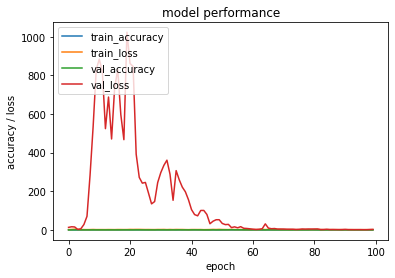

    epoch  accuracy      loss  val_accuracy   val_loss
53     53  0.415385  2.635018      0.714286  12.000859


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 42)
i = 3
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 3:
    model_filepath = '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 4

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 4:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (65, 2)
val shape: (7, 2)
Found 65 validated image filenames belonging to 4 classes.
Found 7 validated image filenames belonging to 4 classes.
Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 1.7207 - accuracy: 0.4923
Epoch 1: val_accuracy improved from -inf to 0.57143, saving model to /content/drive/MyDrive/buktiUji_Skripsi/Model_1/_fold_4_model.h5
3/3 [==============================] - 12s 4s/step - loss: 1.7207 - accuracy: 0.4923 - val_loss: 54.9775 - val_accuracy: 0.5714
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 2.3908 - accuracy: 0.4462
Epoch 2: val_accuracy did not improve from 0.57143
3/3 [==============================] - 2s 622ms/step - loss: 2.3908 - accuracy: 0.4462 - val_loss: 73.4842 - val_accuracy: 0.1429
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 1.5816 - accuracy: 0.4615
Epoch 3: val_accuracy did not improve from 0.57143
3/3 [==============================] - 2s 458ms/step - loss: 1.5816 - a

###EVAL

Found 8 validated image filenames belonging to 4 classes.
1/1 [==============================] - 0s 340ms/step
Predict 0       1       2       3       
Actual
0       1       1       0       0       

1       0       2       0       0       

2       0       1       1       0       

3       0       0       0       2       





Overall Statistics : 

95% CI                                                            (0.44994,1.05006)
ACC Macro                                                         0.875
ARI                                                               0.22222
AUNP                                                              0.83333
AUNU                                                              0.83333
Bangdiwala B                                                      0.625
Bennett S                                                         0.66667
CBA                                                               0.625
CSI                                               

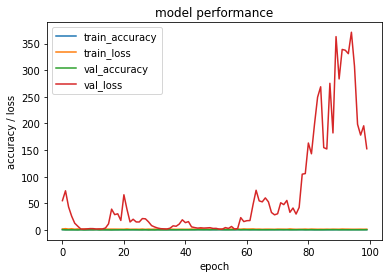

    epoch  accuracy      loss  val_accuracy  val_loss
51     51  0.461538  1.256971      0.571429  1.501489


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 42)
i = 4
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 4:
    model_filepath = '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 5

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 5:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (65, 2)
val shape: (7, 2)
Found 65 validated image filenames belonging to 4 classes.
Found 7 validated image filenames belonging to 4 classes.
Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 2.6358 - accuracy: 0.4615
Epoch 1: val_accuracy improved from -inf to 0.14286, saving model to /content/drive/MyDrive/buktiUji_Skripsi/Model_1/_fold_5_model.h5
3/3 [==============================] - 11s 4s/step - loss: 2.6358 - accuracy: 0.4615 - val_loss: 330.9968 - val_accuracy: 0.1429
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 1.5423 - accuracy: 0.3077
Epoch 2: val_accuracy improved from 0.14286 to 0.28571, saving model to /content/drive/MyDrive/buktiUji_Skripsi/Model_1/_fold_5_model.h5
3/3 [==============================] - 10s 4s/step - loss: 1.5423 - accuracy: 0.3077 - val_loss: 202.3133 - val_accuracy: 0.2857
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 1.5759 - accuracy: 0.3077
Epoch 3: val_accuracy did not improv

###EVAL

Found 8 validated image filenames belonging to 4 classes.


1/1 [==============================] - 0s 322ms/step
Predict 0       1       2       3       
Actual
0       1       0       0       1       

1       1       0       0       1       

2       0       0       1       1       

3       0       0       0       2       





Overall Statistics : 

95% CI                                                            (0.15352,0.84648)
ACC Macro                                                         0.75
ARI                                                               -0.09639
AUNP                                                              0.66667
AUNU                                                              0.66667
Bangdiwala B                                                      0.375
Bennett S                                                         0.33333
CBA                                                               0.35
CSI                                                               None
Chi-Squared                           

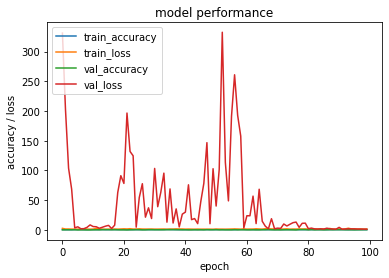

    epoch  accuracy      loss  val_accuracy  val_loss
67     67  0.384615  1.926506      0.571429  1.866987


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 42)
i = 5
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 5:
    model_filepath = '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 6

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 6:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (65, 2)
val shape: (7, 2)
Found 65 validated image filenames belonging to 4 classes.
Found 7 validated image filenames belonging to 4 classes.
Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 1.4177 - accuracy: 0.4154
Epoch 1: val_accuracy improved from -inf to 0.28571, saving model to /content/drive/MyDrive/buktiUji_Skripsi/Model_1/_fold_6_model.h5
3/3 [==============================] - 12s 4s/step - loss: 1.4177 - accuracy: 0.4154 - val_loss: 52.4598 - val_accuracy: 0.2857
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 2.1845 - accuracy: 0.2923
Epoch 2: val_accuracy did not improve from 0.28571
3/3 [==============================] - 2s 647ms/step - loss: 2.1845 - accuracy: 0.2923 - val_loss: 146.6583 - val_accuracy: 0.2857
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 2.2557 - accuracy: 0.2769
Epoch 3: val_accuracy improved from 0.28571 to 0.42857, saving model to /content/drive/MyDrive/buktiUji_Skripsi/Model_1/_

###EVAL

Found 8 validated image filenames belonging to 4 classes.


1/1 [==============================] - 0s 405ms/step
Predict 0       1       2       3       
Actual
0       2       0       0       0       

1       0       2       0       0       

2       1       0       0       1       

3       0       0       1       1       





Overall Statistics : 

95% CI                                                            (0.28952,0.96048)
ACC Macro                                                         0.8125
ARI                                                               0.33962
AUNP                                                              0.75
AUNU                                                              0.75
Bangdiwala B                                                      0.5625
Bennett S                                                         0.5
CBA                                                               0.54167
CSI                                                               0.16667
Chi-Squared                             

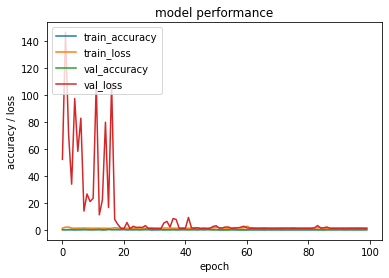

    epoch  accuracy      loss  val_accuracy   val_loss
15     15  0.384615  1.290786      0.714286  16.734409


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 42)
i = 6
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 6:
    model_filepath = '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 7

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 7:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (65, 2)
val shape: (7, 2)
Found 65 validated image filenames belonging to 4 classes.
Found 7 validated image filenames belonging to 4 classes.
Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 1.6427 - accuracy: 0.3077
Epoch 1: val_accuracy improved from -inf to 0.14286, saving model to /content/drive/MyDrive/buktiUji_Skripsi/Model_1/_fold_7_model.h5
3/3 [==============================] - 12s 4s/step - loss: 1.6427 - accuracy: 0.3077 - val_loss: 113.8707 - val_accuracy: 0.1429
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 1.4216 - accuracy: 0.2615
Epoch 2: val_accuracy improved from 0.14286 to 0.42857, saving model to /content/drive/MyDrive/buktiUji_Skripsi/Model_1/_fold_7_model.h5
3/3 [==============================] - 10s 4s/step - loss: 1.4216 - accuracy: 0.2615 - val_loss: 30.7428 - val_accuracy: 0.4286
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 1.5062 - accuracy: 0.2923
Epoch 3: val_accuracy did not improve

###EVAL

Found 8 validated image filenames belonging to 4 classes.
1/1 [==============================] - 0s 348ms/step
Predict 0       1       2       3       
Actual
0       0       0       1       1       

1       2       0       0       0       

2       1       0       1       0       

3       1       0       1       0       





Overall Statistics : 

95% CI                                                            (-0.10418,0.35418)
ACC Macro                                                         0.5625
ARI                                                               -0.05479
AUNP                                                              0.41667
AUNU                                                              0.41667
Bangdiwala B                                                      0.0625
Bennett S                                                         -0.16667
CBA                                                               0.08333
CSI                                        

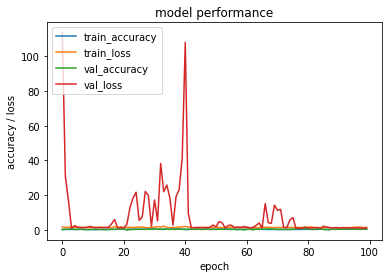

   epoch  accuracy      loss  val_accuracy  val_loss
3      3  0.292308  1.665184      0.714286  0.975696


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 42)
i = 7
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 7:
    model_filepath = '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 8

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 8:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (65, 2)
val shape: (7, 2)
Found 65 validated image filenames belonging to 4 classes.
Found 7 validated image filenames belonging to 4 classes.
Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 1.4006 - accuracy: 0.2769
Epoch 1: val_accuracy improved from -inf to 0.28571, saving model to /content/drive/MyDrive/buktiUji_Skripsi/Model_1/_fold_8_model.h5
3/3 [==============================] - 11s 5s/step - loss: 1.4006 - accuracy: 0.2769 - val_loss: 6.2371 - val_accuracy: 0.2857
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 1.4799 - accuracy: 0.3538
Epoch 2: val_accuracy did not improve from 0.28571
3/3 [==============================] - 3s 1s/step - loss: 1.4799 - accuracy: 0.3538 - val_loss: 3.6301 - val_accuracy: 0.1429
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 1.9336 - accuracy: 0.2615
Epoch 3: val_accuracy improved from 0.28571 to 0.42857, saving model to /content/drive/MyDrive/buktiUji_Skripsi/Model_1/_fold_8

###EVAL

Found 8 validated image filenames belonging to 4 classes.
1/1 [==============================] - 0s 351ms/step
Predict 0       1       2       3       
Actual
0       0       0       1       1       

1       2       0       0       0       

2       1       0       0       1       

3       0       0       0       2       





Overall Statistics : 

95% CI                                                            (-0.05006,0.55006)
ACC Macro                                                         0.625
ARI                                                               0.13699
AUNP                                                              0.5
AUNU                                                              0.5
Bangdiwala B                                                      0.25
Bennett S                                                         0.0
CBA                                                               0.125
CSI                                                           

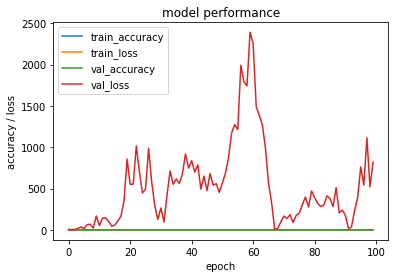

   epoch  accuracy      loss  val_accuracy  val_loss
2      2  0.261538  1.933558      0.428571  6.860559


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 42)
i = 8
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 8:
    model_filepath = '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 9

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 9:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (65, 2)
val shape: (7, 2)
Found 65 validated image filenames belonging to 4 classes.
Found 7 validated image filenames belonging to 4 classes.
Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 1.5885 - accuracy: 0.2462
Epoch 1: val_accuracy improved from -inf to 0.42857, saving model to /content/drive/MyDrive/buktiUji_Skripsi/Model_1/_fold_9_model.h5
3/3 [==============================] - 11s 5s/step - loss: 1.5885 - accuracy: 0.2462 - val_loss: 2.4420 - val_accuracy: 0.4286
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 1.3922 - accuracy: 0.2615
Epoch 2: val_accuracy did not improve from 0.42857
3/3 [==============================] - 2s 637ms/step - loss: 1.3922 - accuracy: 0.2615 - val_loss: 5.4822 - val_accuracy: 0.2857
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 1.4594 - accuracy: 0.3077
Epoch 3: val_accuracy did not improve from 0.42857
3/3 [==============================] - 2s 650ms/step - loss: 1.4594 - acc

###EVAL

Found 8 validated image filenames belonging to 4 classes.
1/1 [==============================] - 0s 377ms/step
Predict 0       1       2       3       
Actual
0       2       0       0       0       

1       2       0       0       0       

2       1       0       0       1       

3       2       0       0       0       





Overall Statistics : 

95% CI                                                            (-0.05006,0.55006)
ACC Macro                                                         0.625
ARI                                                               0.0
AUNP                                                              0.5
AUNU                                                              0.5
Bangdiwala B                                                      0.25
Bennett S                                                         0.0
CBA                                                               0.07143
CSI                                                             

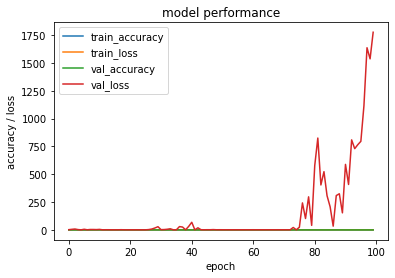

    epoch  accuracy      loss  val_accuracy  val_loss
11     11  0.323077  1.514454      0.571429  1.059595


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 42)
i = 9
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 9:
    model_filepath = '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

##SKEN 10

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 10:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True, 
                                  zoom_range=[0.5,1.0],)

    csv_filepath = CSVLogger('/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (65, 2)
val shape: (7, 2)
Found 65 validated image filenames belonging to 4 classes.
Found 7 validated image filenames belonging to 4 classes.
Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 1.3537 - accuracy: 0.3231
Epoch 1: val_accuracy improved from -inf to 0.28571, saving model to /content/drive/MyDrive/buktiUji_Skripsi/Model_1/_fold_10_model.h5
3/3 [==============================] - 11s 4s/step - loss: 1.3537 - accuracy: 0.3231 - val_loss: 1.3874 - val_accuracy: 0.2857
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 1.5656 - accuracy: 0.2923
Epoch 2: val_accuracy did not improve from 0.28571
3/3 [==============================] - 2s 430ms/step - loss: 1.5656 - accuracy: 0.2923 - val_loss: 3.1000 - val_accuracy: 0.2857
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 1.5540 - accuracy: 0.4000
Epoch 3: val_accuracy did not improve from 0.28571
3/3 [==============================] - 2s 615ms/step - loss: 1.5540 - ac

###EVAL

Found 8 validated image filenames belonging to 4 classes.
1/1 [==============================] - 0s 372ms/step
Predict 0       1       2       3       
Actual
0       0       0       2       0       

1       0       0       2       0       

2       0       0       2       0       

3       0       0       2       0       





Overall Statistics : 

95% CI                                                            (-0.05006,0.55006)
ACC Macro                                                         0.625
ARI                                                               0.0
AUNP                                                              0.5
AUNU                                                              0.5
Bangdiwala B                                                      0.25
Bennett S                                                         0.0
CBA                                                               0.0625
CSI                                                              

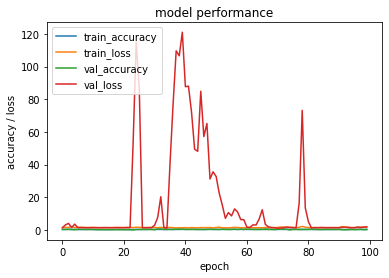

    epoch  accuracy      loss  val_accuracy  val_loss
72     72  0.276923  1.777444      0.571429  1.305398


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 42)
i = 10
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 10:
    model_filepath = '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

#LIST HASIL PENGUJIAN SELURUH SKENARIO

In [ ]:
df_result_experiment = pd.DataFrame()
for i in range(1, 11):
  df_result = pd.read_csv('/content/drive/MyDrive/buktiUji_Skripsi/' +"Model_1/" + '_fold_' + str(i) + '_model.log')
  df_result = df_result[(df_result.val_accuracy == df_result.val_accuracy.max())]
  df_result = df_result[(df_result.val_loss== df_result.val_loss.min())]
  df_result_experiment = pd.concat([df_result_experiment, df_result])


df_result_experiment = df_result_experiment.reset_index(drop=True)
df_result_experiment.index += 1
pd.set_option('display.max_rows', df_result_experiment.shape[0]+1)
df_average =df_result_experiment.iloc[:].mean(axis=0)
df_result_experiment.loc[11] = df_average
df_result_experiment = df_result_experiment.style.background_gradient(cmap='Accent', subset=df_result_experiment.index[-1])
df_result_experiment

,epoch,accuracy,loss,val_accuracy,val_loss
1,84.000000,0.656250,1.760844,0.500000,23.806995
2,84.000000,0.500000,3.962460,0.625000,2.959254
3,53.000000,0.415385,2.635018,0.714286,12.000859
4,51.000000,0.461538,1.256971,0.571429,1.501489
5,67.000000,0.384615,1.926506,0.571429,1.866987
6,15.000000,0.384615,1.290786,0.714286,16.734409
7,3.000000,0.292308,1.665184,0.714286,0.975696
8,2.000000,0.261538,1.933558,0.428571,6.860559
9,11.000000,0.323077,1.514454,0.571429,1.059595
10,72.000000,0.276923,1.777444,0.571429,1.305398


#PENGUJIAN UNSEEN DATA

##SKEN 1

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + '1' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 8 validated image filenames belonging to 3 classes.
1/1 [==============================] - 0s 381ms/step
Predict 0       1       2       3       
Actual
0       0       4       0       0       

1       0       1       0       0       

2       0       2       0       1       

3       0       0       0       0       





Overall Statistics : 

95% CI                                                            (-0.10418,0.35418)
ACC Macro                                                         0.5625
ARI                                                               0.0303
AUNP                                                              None
AUNU                                                              None
Bangdiwala B                                                      0.14286
Bennett S                                                         -0.16667
CBA                                                               0.03571
CSI                                               

##SKEN 2

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + '2' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 8 validated image filenames belonging to 3 classes.
1/1 [==============================] - 0s 357ms/step
Predict 0       1       2       3       
Actual
0       0       0       1       3       

1       0       0       1       0       

2       0       0       0       3       

3       0       0       0       0       





Overall Statistics : 

95% CI                                                            (0.0,0.0)
ACC Macro                                                         0.5
ARI                                                               0.1165
AUNP                                                              None
AUNU                                                              None
Bangdiwala B                                                      0.0
Bennett S                                                         -0.33333
CBA                                                               0.0
CSI                                                               None

##SKEN 3

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + '3' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 8 validated image filenames belonging to 3 classes.
1/1 [==============================] - 0s 346ms/step
Predict 0       1       2       3       
Actual
0       4       0       0       0       

1       1       0       0       0       

2       1       0       0       2       

3       0       0       0       0       





Overall Statistics : 

95% CI                                                            (0.15352,0.84648)
ACC Macro                                                         0.75
ARI                                                               0.25243
AUNP                                                              None
AUNU                                                              None
Bangdiwala B                                                      0.66667
Bennett S                                                         0.33333
CBA                                                               0.16667
CSI                                                  

##SKEN 4

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + '4' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 8 validated image filenames belonging to 3 classes.
1/1 [==============================] - 6s 6s/step
Predict 0       1       2       3       
Actual
0       3       1       0       0       

1       0       1       0       0       

2       1       1       0       1       

3       0       0       0       0       





Overall Statistics : 

95% CI                                                            (0.15352,0.84648)
ACC Macro                                                         0.75
ARI                                                               0.01754
AUNP                                                              None
AUNU                                                              None
Bangdiwala B                                                      0.52632
Bennett S                                                         0.33333
CBA                                                               0.27083
CSI                                                     

##SKEN 5

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + '5' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 8 validated image filenames belonging to 3 classes.
1/1 [==============================] - 6s 6s/step
Predict 0       1       2       3       
Actual
0       0       0       0       4       

1       1       0       0       0       

2       0       0       0       3       

3       0       0       0       0       





Overall Statistics : 

95% CI                                                            (0.0,0.0)
ACC Macro                                                         0.5
ARI                                                               0.27273
AUNP                                                              None
AUNU                                                              None
Bangdiwala B                                                      0.0
Bennett S                                                         -0.33333
CBA                                                               0.0
CSI                                                               None
C

##SKEN 6

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + '6' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 8 validated image filenames belonging to 3 classes.
1/1 [==============================] - 6s 6s/step
Predict 0       1       2       3       
Actual
0       3       1       0       0       

1       1       0       0       0       

2       2       0       0       1       

3       0       0       0       0       





Overall Statistics : 

95% CI                                                            (0.03952,0.71048)
ACC Macro                                                         0.6875
ARI                                                               -0.11443
AUNP                                                              None
AUNU                                                              None
Bangdiwala B                                                      0.36
Bennett S                                                         0.16667
CBA                                                               0.125
CSI                                                       

##SKEN 7

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + '7' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 8 validated image filenames belonging to 3 classes.
1/1 [==============================] - 6s 6s/step
Predict 0       1       2       3       
Actual
0       2       0       2       0       

1       0       0       1       0       

2       0       0       1       2       

3       0       0       0       0       





Overall Statistics : 

95% CI                                                            (0.03952,0.71048)
ACC Macro                                                         0.6875
ARI                                                               0.07229
AUNP                                                              None
AUNU                                                              None
Bangdiwala B                                                      0.25
Bennett S                                                         0.16667
CBA                                                               0.1875
CSI                                                       

##SKEN 8


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + '8' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 8 validated image filenames belonging to 3 classes.


1/1 [==============================] - 6s 6s/step
Predict 0       1       2       3       
Actual
0       0       0       0       4       

1       0       0       1       0       

2       0       0       0       3       

3       0       0       0       0       





Overall Statistics : 

95% CI                                                            (0.0,0.0)
ACC Macro                                                         0.5
ARI                                                               0.27273
AUNP                                                              None
AUNU                                                              None
Bangdiwala B                                                      0.0
Bennett S                                                         -0.33333
CBA                                                               0.0
CSI                                                               None
Chi-Squared                                                

##SKEN 9

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + '9' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 8 validated image filenames belonging to 3 classes.


1/1 [==============================] - 6s 6s/step
Predict 0       1       2       3       
Actual
0       3       0       0       1       

1       1       0       0       0       

2       3       0       0       0       

3       0       0       0       0       





Overall Statistics : 

95% CI                                                            (0.03952,0.71048)
ACC Macro                                                         0.6875
ARI                                                               -0.09091
AUNP                                                              None
AUNU                                                              None
Bangdiwala B                                                      0.32143
Bennett S                                                         0.16667
CBA                                                               0.10714
CSI                                                               None
Chi-Squared                             

##SKEN 10

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + '10' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 8 validated image filenames belonging to 3 classes.
1/1 [==============================] - 6s 6s/step
Predict 0       1       2       
Actual
0       0       0       4       

1       0       0       1       

2       1       0       2       





Overall Statistics : 

95% CI                                                            (-0.05006,0.55006)
ACC Macro                                                         0.5
ARI                                                               0.0303
AUNP                                                              0.375
AUNU                                                              0.40278
Bangdiwala B                                                      0.16
Bennett S                                                         -0.125
CBA                                                               0.09524
CSI                                                               None
Chi-Squared                                                 

#UJI COBA KLASIFIKASI 1

1/1 [==============================] - 2s 2s/step
prediction is chickenpox


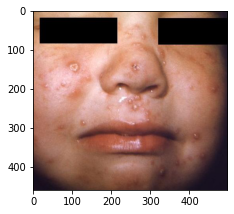

In [ ]:
model_filepath =  '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + '2' + '_model.h5'
model = load_model(model_filepath)

def plot_img_array(path):
  img = image.load_img(path)
  plt.grid(False)
  plt.imshow(img)


def predict_image(model, google_drive=None):
  if google_drive == None:
    uploaded = files.upload()
    for fn in uploaded.keys():
      path = '/content/' + fn
  else:
    path = google_drive
  image = tf.keras.preprocessing.image.load_img(path,  
                                                  target_size=image_size, )
  input_arr = tf.keras.preprocessing.image.img_to_array(image) / 255
  input_arr = np.array([input_arr]) 
  classes = model.predict(input_arr)
  
  rows = 10
  cols = 2
  plt.figure(figsize=(2*4*cols, 4*rows))  
  index = 1
  plt.subplot(rows, cols * 2, index*2 + 1)
  plot_img_array(path)
  keyList = list(class_names.keys())
  valList = list(class_names.values())
  position = valList.index(np.argmax(classes)) 
  prediction = 'prediction is ' + str(keyList[position])
  print(prediction) 
  if google_drive == None:
    os.remove(path)

def plot_predict_value_array(predictions_array):
  plt.grid(False)
  plt.ylim([0, 1])

predict_image(model, '/content/drive/MyDrive/buktiUji_Skripsi/Dataset/chickenpox/chickenpox (313).jpg')

#UJI COBA KLASIFIKASI 2

1/1 [==============================] - 1s 1s/step
prediction is monkeypox


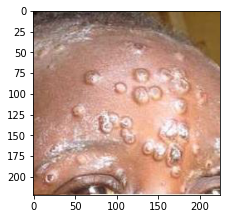

In [ ]:
model_filepath =  '/content/drive/MyDrive/buktiUji_Skripsi/' + "Model_1/" + '_fold_' + '2' + '_model.h5'
model = load_model(model_filepath)

def plot_img_array(path):
  img = image.load_img(path)
  plt.grid(False)
  plt.imshow(img)


def predict_image(model, google_drive=None):
  if google_drive == None:
    uploaded = files.upload()
    for fn in uploaded.keys():
      path = '/content/' + fn
  else:
    path = google_drive
  image = tf.keras.preprocessing.image.load_img(path,  
                                                  target_size=image_size, )
  input_arr = tf.keras.preprocessing.image.img_to_array(image) / 255
  input_arr = np.array([input_arr]) 
  classes = model.predict(input_arr)
  
  rows = 10
  cols = 2
  plt.figure(figsize=(2*4*cols, 4*rows))  
  index = 1
  plt.subplot(rows, cols * 2, index*2 + 1)
  plot_img_array(path)
  keyList = list(class_names.keys())
  valList = list(class_names.values())
  position = valList.index(np.argmax(classes)) 
  prediction = 'prediction is ' + str(keyList[position])
  print(prediction) 
  if google_drive == None:
    os.remove(path)

def plot_predict_value_array(predictions_array):
  plt.grid(False)
  plt.ylim([0, 1])

predict_image(model, '/content/drive/MyDrive/buktiUji_Skripsi/Dataset/monkeypox/monkeypox (195).jpg')